In [288]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Set up API
api = KaggleApi()
api.authenticate()

# Download dataset to a specified directory
dataset = 'rohanrao/formula-1-world-championship-1950-2020'
download_path = "./data"
api.dataset_download_files(dataset, path=download_path, unzip=True)


Dataset URL: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020


In [289]:
#read seasons.csv
import pandas as pd


In [290]:
#read circuits.csv
circuits = pd.read_csv(download_path + '/circuits.csv')

drivers = pd.read_csv(download_path + '/drivers.csv')


In [291]:
# add 7 to all altitudes 
circuits['alt'] = circuits['alt'] + 8


In [292]:
#plot all locations on a map
import folium
from folium.plugins import MarkerCluster
    
# Create a map centered at the mean latitude and longitude


m = folium.Map(location=[circuits['lat'].mean(), circuits['lng'].mean()], zoom_start=2)

# Add a marker for each circuit
for i in range(len(circuits)):
    folium.Marker([circuits.iloc[i]['lat'], circuits.iloc[i]['lng']], popup=circuits.iloc[i]['name']).add_to(m)
    
# m   



In [293]:
#read races.csv and select circiuts for 2024
races = pd.read_csv(f'{download_path}/races.csv')
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [294]:
#last year races
last_year_r = races.where(cond=races['year']==2024)
#drop Nan rows
last_year_r = last_year_r.dropna()

In [295]:
current_season = circuits[circuits['circuitId'].isin(last_year_r['circuitId'])]

In [296]:
m = folium.Map(location=[current_season['lat'].mean(), current_season['lng'].mean()], zoom_start=2)

# Add a marker for each circuit
for i in range(len(current_season)):
    folium.Marker([current_season.iloc[i]['lat'], current_season.iloc[i]['lng']], popup=current_season.iloc[i]['name']).add_to(m)


In [297]:
# for each file in data dir find rows with no data 
# and print them
import os
import pandas as pd
    
data_dir = './data/'
for file in os.listdir(data_dir):
    if file.endswith('.csv'):
        df = pd.read_csv(data_dir + '/' + file)
        print(f'File: {file}')
        print(df[df.isnull().any(axis=1)])
        print('\n') 


File: lap_times.csv
Empty DataFrame
Columns: [raceId, driverId, lap, position, time, milliseconds]
Index: []


File: constructors.csv
Empty DataFrame
Columns: [constructorId, constructorRef, name, nationality, url]
Index: []


File: status.csv
Empty DataFrame
Columns: [statusId, status]
Index: []


File: driver_standings.csv
Empty DataFrame
Columns: [driverStandingsId, raceId, driverId, points, position, positionText, wins]
Index: []


File: results.csv
Empty DataFrame
Columns: [resultId, raceId, driverId, constructorId, number, grid, position, positionText, positionOrder, points, laps, time, milliseconds, fastestLap, rank, fastestLapTime, fastestLapSpeed, statusId]
Index: []


File: races.csv
Empty DataFrame
Columns: [raceId, year, round, circuitId, name, date, time, url, fp1_date, fp1_time, fp2_date, fp2_time, fp3_date, fp3_time, quali_date, quali_time, sprint_date, sprint_time]
Index: []


File: constructor_results.csv
Empty DataFrame
Columns: [constructorResultsId, raceId, construc

In [298]:
# print amount of rows in each file
for file in os.listdir(data_dir):
    if file.endswith('.csv'):
        df = pd.read_csv(data_dir + '/' + file)
        print(f'File: {file}, Rows: {len(df)}')



File: lap_times.csv, Rows: 575029
File: constructors.csv, Rows: 212
File: status.csv, Rows: 139
File: driver_standings.csv, Rows: 34595
File: results.csv, Rows: 26519
File: races.csv, Rows: 1125
File: constructor_results.csv, Rows: 12505
File: drivers.csv, Rows: 859
File: circuits.csv, Rows: 77
File: sprint_results.csv, Rows: 300
File: constructor_standings.csv, Rows: 13271
File: qualifying.csv, Rows: 10254
File: pit_stops.csv, Rows: 10990
File: seasons.csv, Rows: 75


In [299]:
#load data from constructor_results.csv
constructor = pd.read_csv('./data/constructors.csv')
display(constructor)

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri
210,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team


In [300]:
#take only mclaren williams and ferrari
mclaren = constructor[constructor['name'] == 'McLaren']
williams = constructor[constructor['name'] == 'Williams']
ferrari = constructor[constructor['name'] == 'Ferrari']

In [301]:
display(mclaren)
display(williams)
display(ferrari)

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren


,constructorId,constructorRef,name,nationality,url
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...


,constructorId,constructorRef,name,nationality,url
5,6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari


In [302]:
display(races)

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,1140,2024,20,32,Mexico City Grand Prix,2024-10-27,20:00:00,https://en.wikipedia.org/wiki/2024_Mexico_City...,2024-10-25,18:30:00,2024-10-25,22:00:00,2024-10-26,17:30:00,2024-10-26,21:00:00,\N,\N
1121,1141,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,https://en.wikipedia.org/wiki/2024_S%C3%A3o_Pa...,2024-11-01,14:30:00,2024-11-01,18:30:00,\N,\N,2024-11-02,18:00:00,2024-11-02,14:00:00
1122,1142,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00,\N,\N
1123,1143,2024,23,78,Qatar Grand Prix,2024-12-01,17:00:00,https://en.wikipedia.org/wiki/2024_Qatar_Grand...,2024-11-29,13:30:00,2024-11-29,17:30:00,\N,\N,2024-11-30,17:00:00,2024-11-30,13:00:00


In [303]:
#load data from constructor_results.csv
constructor_results = pd.read_csv('./data/constructor_results.csv')
display(constructor_results)

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
...,...,...,...,...,...
12500,17005,1132,117,10.0,\N
12501,17006,1132,3,2.0,\N
12502,17007,1132,215,1.0,\N
12503,17008,1132,15,0.0,\N


In [304]:
constructorID = mclaren['constructorId'].values[0]
mclaren_results = constructor_results[constructor_results['constructorId'] == constructorID]
# mclaren_results = mclaren_results.merge
display(mclaren_results)

#load data from constructor_standings.csv
constructor_standings = pd.read_csv('./data/constructor_standings.csv')
mclaren_standings = constructor_standings[constructor_standings['constructorId'] == constructorID]
display(mclaren_standings)


,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
13,14,19,1,10.0,\N
24,25,20,1,4.0,\N
34,35,21,1,6.0,\N
45,46,22,1,8.0,\N
...,...,...,...,...,...
12456,16961,1128,1,30.0,\N
12466,16971,1129,1,28.0,\N
12476,16981,1130,1,25.0,\N
12486,16991,1131,1,31.0,\N


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
6,7,19,1,24.0,1,1,1
17,18,20,1,28.0,3,3,1
28,29,21,1,34.0,3,3,1
39,40,22,1,42.0,3,3,1
...,...,...,...,...,...,...,...
13224,28806,1128,1,184.0,3,3,1
13234,28816,1129,1,212.0,3,3,1
13244,28826,1130,1,237.0,3,3,1
13254,28836,1131,1,268.0,3,3,1


In [305]:
constructorIDs = [mclaren['constructorId'].values[0], williams['constructorId'].values[0], ferrari['constructorId'].values[0]]
trio_results = constructor_results[constructor_results['constructorId'].isin(constructorIDs)]
display(trio_results)

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
2,3,18,3,9.0,\N
5,6,18,6,1.0,\N
11,12,19,6,10.0,\N
13,14,19,1,10.0,\N
...,...,...,...,...,...
12487,16992,1131,6,21.0,\N
12493,16998,1131,3,0.0,\N
12497,17002,1132,1,27.0,\N
12498,17003,1132,6,11.0,\N


In [306]:
lap_times = pd.read_csv('./data/lap_times.csv')
display(lap_times)

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
575024,1131,858,65,19,1:10.742,70742
575025,1131,858,66,19,1:10.855,70855
575026,1131,858,67,19,1:12.454,72454
575027,1131,858,68,19,1:13.607,73607


In [307]:
#get races for trio_results
trio_lap_times = lap_times[lap_times['raceId'].isin(trio_results['raceId'])]
#race id is not enough to join
# display(trio_lap_times['raceId'].nunique())
display(trio_results[trio_results['raceId'] == 841])


,constructorResultsId,raceId,constructorId,points,status
9632,14130,841,1,26.0,\N
9634,14132,841,6,18.0,\N
9640,14138,841,3,0.0,\N


In [308]:
test = trio_lap_times[trio_lap_times['raceId'] == 1131 ]
display(test)

,raceId,driverId,lap,position,time,milliseconds
573624,1131,830,1,1,1:12.050,72050
573625,1131,830,2,1,1:09.938,69938
573626,1131,830,3,1,1:09.857,69857
573627,1131,830,4,1,1:09.903,69903
573628,1131,830,5,1,1:10.005,70005
...,...,...,...,...,...,...
575024,1131,858,65,19,1:10.742,70742
575025,1131,858,66,19,1:10.855,70855
575026,1131,858,67,19,1:12.454,72454
575027,1131,858,68,19,1:13.607,73607


# dla konstruktora o id =1 dla wyścigu o id= 1131

In [309]:
#load results
results = pd.read_csv('./data/results.csv')
display(results)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26514,26520,1132,839,214,31,18,16,16,16,0.0,50,\N,\N,46,16,1:30.875,233.371,12
26515,26521,1132,815,9,11,0,17,17,17,0.0,50,\N,\N,50,6,1:29.707,236.409,12
26516,26522,1132,855,15,24,14,18,18,18,0.0,50,\N,\N,43,17,1:31.014,233.014,12
26517,26523,1132,847,131,63,1,\N,R,19,0.0,33,\N,\N,3,19,1:31.298,232.289,34


In [310]:
team_ids = [1,3,6]
race_ids = [1124,1128,1131]

In [311]:
driverId = results[(results['raceId'].isin(race_ids)) & (results['constructorId'] == 1)]['driverId']
display(driverId)

26343    846
26346    857
26420    857
26422    846
26480    857
26498    846
Name: driverId, dtype: int64

In [312]:
lap_times = pd.read_csv('./data/lap_times.csv')

In [313]:
#mclaren laptimes
mclaren_lap_times = lap_times[(lap_times['raceId'].isin(race_ids)) & (lap_times['driverId'].isin(driverId))]


In [314]:
display(mclaren_lap_times)

,raceId,driverId,lap,position,time,milliseconds
565637,1124,846,1,3,2:14.751,134751
565638,1124,846,2,3,28:30.610,1710610
565639,1124,846,3,3,2:51.325,171325
565640,1124,846,4,3,1:36.853,96853
565641,1124,846,5,3,1:36.860,96860
...,...,...,...,...,...,...
574109,1131,857,67,2,1:09.532,69532
574110,1131,857,68,2,1:09.241,69241
574111,1131,857,69,2,1:09.159,69159
574112,1131,857,70,2,1:09.989,69989


In [315]:
# append column with name Maclaren
mclaren_lap_times['name'] = 'Maclaren'
display(mclaren_lap_times)

/tmp/ipykernel_2176/326417809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mclaren_lap_times['name'] = 'Maclaren'


,raceId,driverId,lap,position,time,milliseconds,name
565637,1124,846,1,3,2:14.751,134751,Maclaren
565638,1124,846,2,3,28:30.610,1710610,Maclaren
565639,1124,846,3,3,2:51.325,171325,Maclaren
565640,1124,846,4,3,1:36.853,96853,Maclaren
565641,1124,846,5,3,1:36.860,96860,Maclaren
...,...,...,...,...,...,...,...
574109,1131,857,67,2,1:09.532,69532,Maclaren
574110,1131,857,68,2,1:09.241,69241,Maclaren
574111,1131,857,69,2,1:09.159,69159,Maclaren
574112,1131,857,70,2,1:09.989,69989,Maclaren


In [316]:
team_ids = [1,3,6]
race_ids = [1124,1128,1131]

In [317]:
# do the same for williams
driverId = results[(results['raceId'].isin(race_ids)) & (results['constructorId'] == 3)]['driverId']
williams_lap_times = lap_times[(lap_times['raceId'].isin(race_ids)) & (lap_times['driverId'].isin(driverId))] 
williams_lap_times['name'] = 'Williams'
display(williams_lap_times)


/tmp/ipykernel_2176/4197140712.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  williams_lap_times['name'] = 'Williams'


,raceId,driverId,lap,position,time,milliseconds,name
566372,1124,858,1,17,3:08.456,188456,Williams
566373,1124,858,2,17,28:24.529,1704529,Williams
566374,1124,858,3,18,2:12.603,132603,Williams
566375,1124,858,4,18,1:40.424,100424,Williams
566376,1124,858,5,17,1:39.668,99668,Williams
...,...,...,...,...,...,...,...
575024,1131,858,65,19,1:10.742,70742,Williams
575025,1131,858,66,19,1:10.855,70855,Williams
575026,1131,858,67,19,1:12.454,72454,Williams
575027,1131,858,68,19,1:13.607,73607,Williams


In [318]:
# do the same for ferrari
driverId = results[(results['raceId'].isin(race_ids)) & (results['constructorId'] == 6)]['driverId']
ferrari_lap_times = lap_times[(lap_times['raceId'].isin(race_ids)) & (lap_times['driverId'].isin(driverId))]
ferrari_lap_times['name'] = 'Ferrari'
display(ferrari_lap_times)

/tmp/ipykernel_2176/2597576230.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ferrari_lap_times['name'] = 'Ferrari'


,raceId,driverId,lap,position,time,milliseconds,name
565690,1124,832,1,4,2:17.613,137613,Ferrari
565691,1124,832,2,4,28:32.219,1712219,Ferrari
565692,1124,832,3,4,2:47.321,167321,Ferrari
565693,1124,832,4,4,1:37.225,97225,Ferrari
565694,1124,832,5,4,1:37.322,97322,Ferrari
...,...,...,...,...,...,...,...
574885,1131,844,67,12,1:10.353,70353,Ferrari
574886,1131,844,68,12,1:10.413,70413,Ferrari
574887,1131,844,69,12,1:10.739,70739,Ferrari
574888,1131,844,70,11,1:10.488,70488,Ferrari


In [319]:
#concatenate all dataframes
all_lap_times = pd.concat([mclaren_lap_times, williams_lap_times, ferrari_lap_times])
display(all_lap_times)

,raceId,driverId,lap,position,time,milliseconds,name
565637,1124,846,1,3,2:14.751,134751,Maclaren
565638,1124,846,2,3,28:30.610,1710610,Maclaren
565639,1124,846,3,3,2:51.325,171325,Maclaren
565640,1124,846,4,3,1:36.853,96853,Maclaren
565641,1124,846,5,3,1:36.860,96860,Maclaren
...,...,...,...,...,...,...,...
574885,1131,844,67,12,1:10.353,70353,Ferrari
574886,1131,844,68,12,1:10.413,70413,Ferrari
574887,1131,844,69,12,1:10.739,70739,Ferrari
574888,1131,844,70,11,1:10.488,70488,Ferrari


In [320]:
def get_constructor_race_laptimes(constructor_id, race_id):
    team_name = constructor[constructor['constructorId'] == constructor_id]['name'].values[0]
    driver_id = results[(results['raceId'] == race_id) & (results['constructorId'] == constructor_id)]['driverId']
    if driver_id.empty:
        return "NO DATA"
    constructor_lap_times = lap_times[(lap_times['raceId'] == race_id) & (lap_times['driverId'].isin(driver_id))].copy()

    constructor_lap_times.loc[:,'name'] = team_name
    return constructor_lap_times

    

In [321]:
print(get_constructor_race_laptimes(1, 1124))
print(get_constructor_race_laptimes(9, 1124))

        raceId  driverId  lap  position       time  milliseconds     name
565637    1124       846    1         3   2:14.751        134751  McLaren
565638    1124       846    2         3  28:30.610       1710610  McLaren
565639    1124       846    3         3   2:51.325        171325  McLaren
565640    1124       846    4         3   1:36.853         96853  McLaren
565641    1124       846    5         3   1:36.860         96860  McLaren
...        ...       ...  ...       ...        ...           ...      ...
565844    1124       857   49         7   1:36.179         96179  McLaren
565845    1124       857   50         7   1:36.228         96228  McLaren
565846    1124       857   51         7   1:35.429         95429  McLaren
565847    1124       857   52         7   1:36.164         96164  McLaren
565848    1124       857   53         8   1:36.611         96611  McLaren

[106 rows x 7 columns]
        raceId  driverId  lap  position       time  milliseconds      name
565531    112

In [322]:
def get_mean_lap_time(constructor_lap_times):
    constructor_lap_times = constructor_lap_times.sort_values(by=['driverId', 'lap'])
    
    mean_time = constructor_lap_times.groupby(['raceId','driverId', 'name'])['milliseconds'].mean()/1000
    mean_time = mean_time.to_frame()
    mean_time = mean_time.reset_index()
    mean_time = mean_time.merge(races[['raceId', 'circuitId']], on='raceId', how='left')
    mean_time = mean_time.merge(circuits[['circuitId', 'name','alt']], on='circuitId', how='left')
    mean_time = mean_time.merge(drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')
    mean_time = mean_time.rename(columns={'name_x': 'team_name', 'name_y': 'circuit_name'})
    return mean_time

In [323]:
print(get_mean_lap_time(mclaren_lap_times))



   raceId  driverId team_name  milliseconds  circuitId       circuit_name  \
0    1124       846  Maclaren    130.061623         22     Suzuka Circuit   
1    1124       857  Maclaren    130.397943         22     Suzuka Circuit   
2    1128       846  Maclaren    110.310308          6  Circuit de Monaco   
3    1128       857  Maclaren    110.291103          6  Circuit de Monaco   
4    1131       846  Maclaren     71.735219         70      Red Bull Ring   
5    1131       857  Maclaren     71.333859         70      Red Bull Ring   

   alt forename  surname  
0   53    Lando   Norris  
1   53    Oscar  Piastri  
2   15    Lando   Norris  
3   15    Oscar  Piastri  
4  686    Lando   Norris  
5  686    Oscar  Piastri  


In [324]:
#read drivers.csv
drivers = pd.read_csv(download_path + '/drivers.csv')
display(drivers)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri
856,858,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant
857,859,lawson,40,LAW,Liam,Lawson,2002-02-11,New Zealander,http://en.wikipedia.org/wiki/Liam_Lawson


In [325]:
#append circuitid to mean_time form mclaren
mclaren_mean_time = get_mean_lap_time(mclaren_lap_times)
display(mclaren_mean_time)

,raceId,driverId,team_name,milliseconds,circuitId,circuit_name,alt,forename,surname
0,1124,846,Maclaren,130.061623,22,Suzuka Circuit,53,Lando,Norris
1,1124,857,Maclaren,130.397943,22,Suzuka Circuit,53,Oscar,Piastri
2,1128,846,Maclaren,110.310308,6,Circuit de Monaco,15,Lando,Norris
3,1128,857,Maclaren,110.291103,6,Circuit de Monaco,15,Oscar,Piastri
4,1131,846,Maclaren,71.735219,70,Red Bull Ring,686,Lando,Norris
5,1131,857,Maclaren,71.333859,70,Red Bull Ring,686,Oscar,Piastri


In [326]:
races_2023 = races[races['year'] == 2023]

current_season = circuits[circuits['circuitId'].isin(races_2023['circuitId'])]
current_season = current_season.sort_values('alt')

current_season_tracks = current_season[['circuitId','name', 'location', 'alt']].reset_index(drop=True)
display(current_season_tracks)

,circuitId,name,location,alt
0,73,Baku City Circuit,Baku,1
1,79,Miami International Autodrome,Miami,8
2,24,Yas Marina Circuit,Abu Dhabi,11
3,39,Circuit Park Zandvoort,Zandvoort,14
4,3,Bahrain International Circuit,Sakhir,15
5,6,Circuit de Monaco,Monte-Carlo,15
6,1,Albert Park Grand Prix Circuit,Melbourne,18
7,78,Losail International Circuit,Al Daayen,20
8,7,Circuit Gilles Villeneuve,Montreal,21
9,77,Jeddah Corniche Circuit,Jeddah,23


In [327]:




# display(current_season_tracks)
# X = current_season_tracks['alt']
# display(X)
# X = list((current_season_tracks['alt'], current_season_tracks['location']))

#raceId	driverId	name_x	milliseconds	circuitId	name_y	alt	forename	surname make dataframe
Y = pd.DataFrame(columns=['raceId', 'driverId', 'team_name', 'milliseconds', 'circuitId', 'circuit_name', 'alt', 'forename', 'surname'])


for index, row in races_2023.iterrows():
    Y = pd.concat([Y, get_mean_lap_time(get_constructor_race_laptimes(1, row['raceId']))])
    # Y.concat(get_mean_lap_time(get_constructor_race_laptimes(1, row['raceId'])))

display(Y)




/tmp/ipykernel_2176/2524376289.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Y = pd.concat([Y, get_mean_lap_time(get_constructor_race_laptimes(1, row['raceId']))])


,raceId,driverId,team_name,milliseconds,circuitId,circuit_name,alt,forename,surname
0,1098,846,McLaren,102.606764,3,Bahrain International Circuit,15,Lando,Norris
1,1098,857,McLaren,103.275769,3,Bahrain International Circuit,15,Oscar,Piastri
0,1099,846,McLaren,99.226780,77,Jeddah Corniche Circuit,23,Lando,Norris
1,1099,857,McLaren,99.198300,77,Jeddah Corniche Circuit,23,Oscar,Piastri
0,1100,846,McLaren,157.966759,1,Albert Park Grand Prix Circuit,18,Lando,Norris
1,1100,857,McLaren,157.995741,1,Albert Park Grand Prix Circuit,18,Oscar,Piastri
0,1101,846,McLaren,110.643373,73,Baku City Circuit,1,Lando,Norris
1,1101,857,McLaren,110.763471,73,Baku City Circuit,1,Oscar,Piastri
0,1102,846,McLaren,93.788737,79,Miami International Autodrome,8,Lando,Norris
1,1102,857,McLaren,94.263411,79,Miami International Autodrome,8,Oscar,Piastri


In [328]:
# for each race id get fastest lap time and calculate delta to fastest lap

# for each record calculate difference between time in milliseconds of this record and the fastest time for each race by raceId
# and add it as a new column to the dataframe
# display(Y)
Y['delta'] = Y.groupby('raceId')['milliseconds'].transform(lambda x: x - x.min())
display(Y)


,raceId,driverId,team_name,milliseconds,circuitId,circuit_name,alt,forename,surname,delta
0,1098,846,McLaren,102.606764,3,Bahrain International Circuit,15,Lando,Norris,0.000000
1,1098,857,McLaren,103.275769,3,Bahrain International Circuit,15,Oscar,Piastri,0.669006
0,1099,846,McLaren,99.226780,77,Jeddah Corniche Circuit,23,Lando,Norris,0.028480
1,1099,857,McLaren,99.198300,77,Jeddah Corniche Circuit,23,Oscar,Piastri,0.000000
0,1100,846,McLaren,157.966759,1,Albert Park Grand Prix Circuit,18,Lando,Norris,0.000000
1,1100,857,McLaren,157.995741,1,Albert Park Grand Prix Circuit,18,Oscar,Piastri,0.028983
0,1101,846,McLaren,110.643373,73,Baku City Circuit,1,Lando,Norris,0.000000
1,1101,857,McLaren,110.763471,73,Baku City Circuit,1,Oscar,Piastri,0.120098
0,1102,846,McLaren,93.788737,79,Miami International Autodrome,8,Lando,Norris,0.000000
1,1102,857,McLaren,94.263411,79,Miami International Autodrome,8,Oscar,Piastri,0.474674


In [329]:
display(current_season_tracks)

,circuitId,name,location,alt
0,73,Baku City Circuit,Baku,1
1,79,Miami International Autodrome,Miami,8
2,24,Yas Marina Circuit,Abu Dhabi,11
3,39,Circuit Park Zandvoort,Zandvoort,14
4,3,Bahrain International Circuit,Sakhir,15
5,6,Circuit de Monaco,Monte-Carlo,15
6,1,Albert Park Grand Prix Circuit,Melbourne,18
7,78,Losail International Circuit,Al Daayen,20
8,7,Circuit Gilles Villeneuve,Montreal,21
9,77,Jeddah Corniche Circuit,Jeddah,23


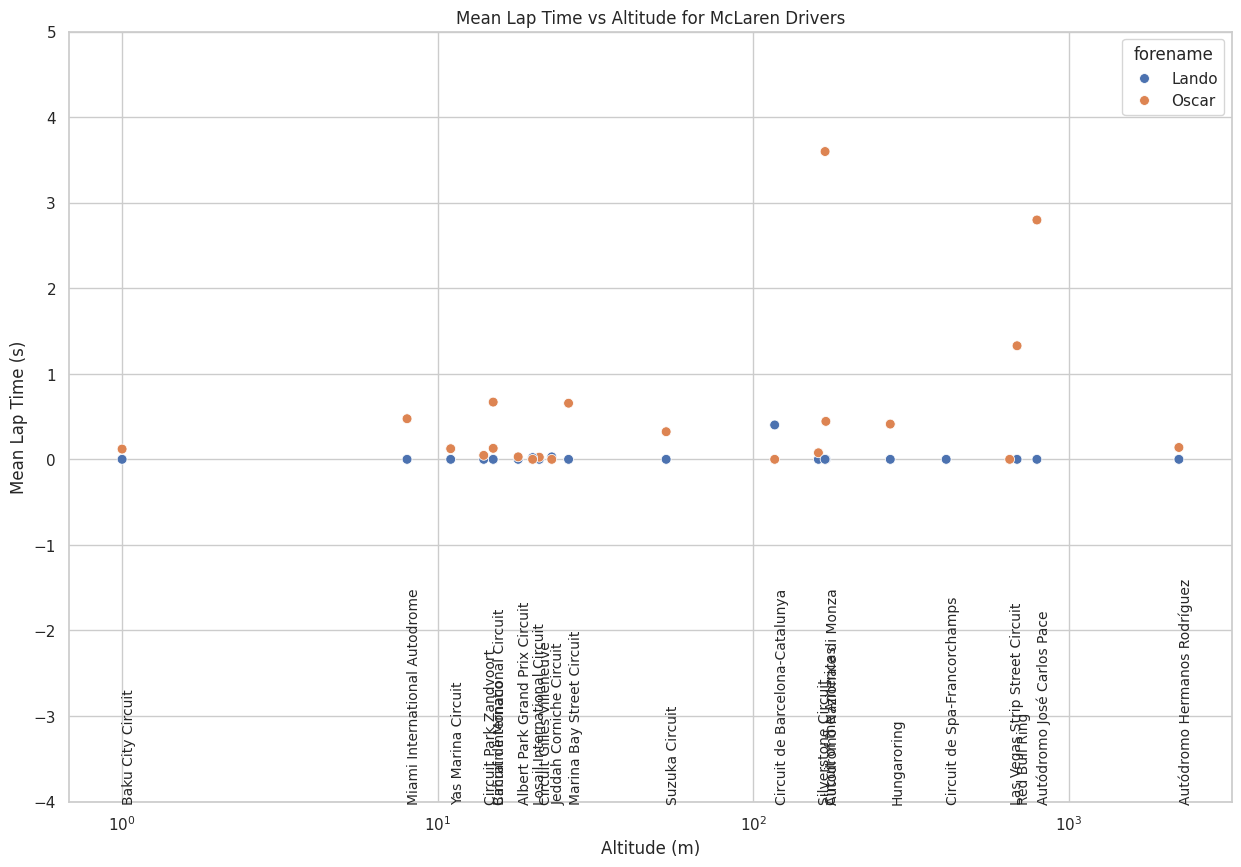

In [339]:
# plot millisecond time vs altitude for each driver
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.scatterplot(data=Y, x='alt', y='delta', hue='forename', s=50)
#add values of alt below x axis as names of tracks
for i in range(len(current_season_tracks)):
    plt.text(current_season_tracks['alt'][i], -4, current_season_tracks['name'][i], rotation=90, fontsize=10)

plt.title('Mean Lap Time vs Altitude for McLaren Drivers')
plt.xlabel('Altitude (m)')
plt.ylabel('Mean Lap Time (s)')
plt.ylim(-4, 5)
plt.xscale('log')
plt.show()

